# Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import os

# Import du csv en dataframe

In [2]:
os.getcwd()
df = pd.read_csv('customer_churn_telecom_services.csv') # chargement données


# Exploration du dataframe

In [3]:
print("Colonnes disponibles :", df.columns.tolist())

Colonnes disponibles : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


- **gender** : Sexe du client (Male/Female).  

- **SeniorCitizen** : Indique si le client est un senior (1 = Oui, 0 = Non).  

- **Partner** : Indique si le client a un(e) conjoint(e) (Yes/No).  

- **Dependents** : Indique si le client a des personnes à charge (Yes/No).  

- **tenure** : Nombre de mois pendant lesquels le client est resté chez l’opérateur.  

- **PhoneService** : Indique si le client a un service de téléphonie (Yes/No).  

- **MultipleLines** : Indique si le client a plusieurs lignes téléphoniques (Yes/No/No phone service).  

- **InternetService** : Type d’abonnement Internet du client (DSL/Fiber optic/No).  

- **OnlineSecurity** : Indique si le client a souscrit un service de sécurité en ligne (Yes/No/No internet service).  

- **OnlineBackup** : Indique si le client a souscrit un service de sauvegarde en ligne (Yes/No/No internet service).  

- **DeviceProtection** : Indique si le client a souscrit une protection pour ses appareils (Yes/No/No internet service).  

- **TechSupport** : Indique si le client a souscrit un support technique (Yes/No/No internet service).  

- **StreamingTV** : Indique si le client a souscrit un service de streaming TV (Yes/No/No internet service).  

- **StreamingMovies** : Indique si le client a souscrit un service de streaming de films (Yes/No/No internet service).  

- **Contract** : Type de contrat du client (Month-to-month/One year/Two year).  

- **PaperlessBilling** : Indique si le client utilise la facturation électronique (Yes/No).  

- **PaymentMethod** : Méthode de paiement du client (Bank transfer/credit card/electronic check/etc.).  

- **MonthlyCharges** : Montant facturé chaque mois au client.  

- **TotalCharges** : Montant total payé par le client depuis son inscription.  

- **Churn** : Variable cible, indiquant si le client a résilié son abonnement (Yes/No).  


In [4]:
print("Taille du dataframe :",df.shape )
df.head(10)

Taille du dataframe : (7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
for col in df.select_dtypes(include='object').columns: #quels valeurs possibles par catégorie
    print(f"\n{col}: {df[col].unique()}")


gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']


In [6]:
categorial_col = df.select_dtypes(include='object')
categorial_col

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [7]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
print(df.head()) #aperçu de la df 
print(df.describe()) #donne les stat, moyennes, quartiles, min, max. 
print(df.isnull().sum()) # Vérification des valeurs manquantes
print(df.duplicated().sum()) # Vérification des doublons
for col in df.select_dtypes(include='object').columns: #quels valeurs possibles par catégorie
    print(f"\n{col}: {df[col].unique()}")


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [10]:
df.shape[0]

7043

In [11]:
colonne_categorielle = df.select_dtypes(include='object').columns


In [12]:
colonne_numerique = df.select_dtypes(include=['number'])
colonne_numerique

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


# Corrélation

/Users/julesbesson/Documents/CENTRALE marseille/S9/PROJET_DDEFI_2025/FINAL_PROJECT
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')
Corrélation de Churn_Yes 

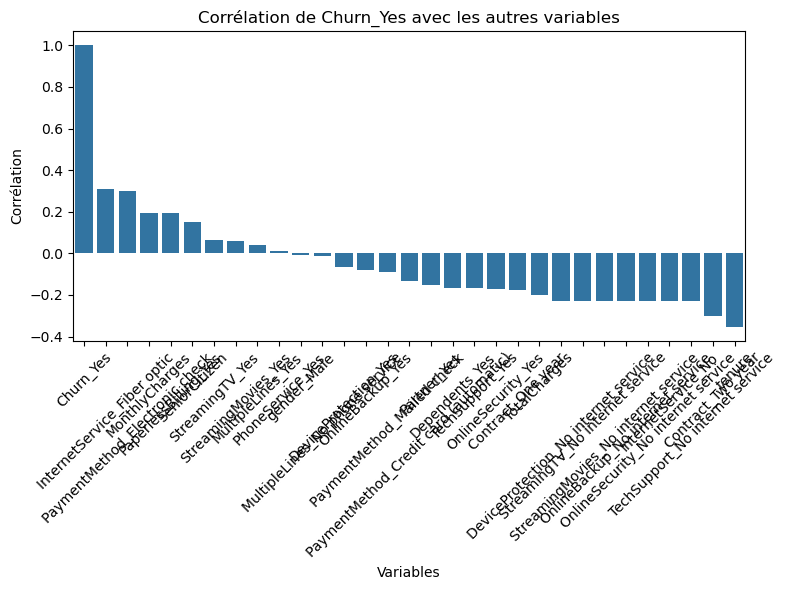

In [13]:
from Pipeline import pipeline

df_corr = df.copy()
df_corr = pipeline(df_corr)
print(df_corr.columns)
target_variable = 'Churn_Yes'

correlation = df_corr.corr()[target_variable].sort_values(ascending=False)

# Afficher les résultats de la corrélation
print(f"Corrélation de {target_variable} avec les autres variables :")
print(correlation)

# Visualisation sous forme de bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title(f"Corrélation de {target_variable} avec les autres variables")
plt.ylabel('Corrélation')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

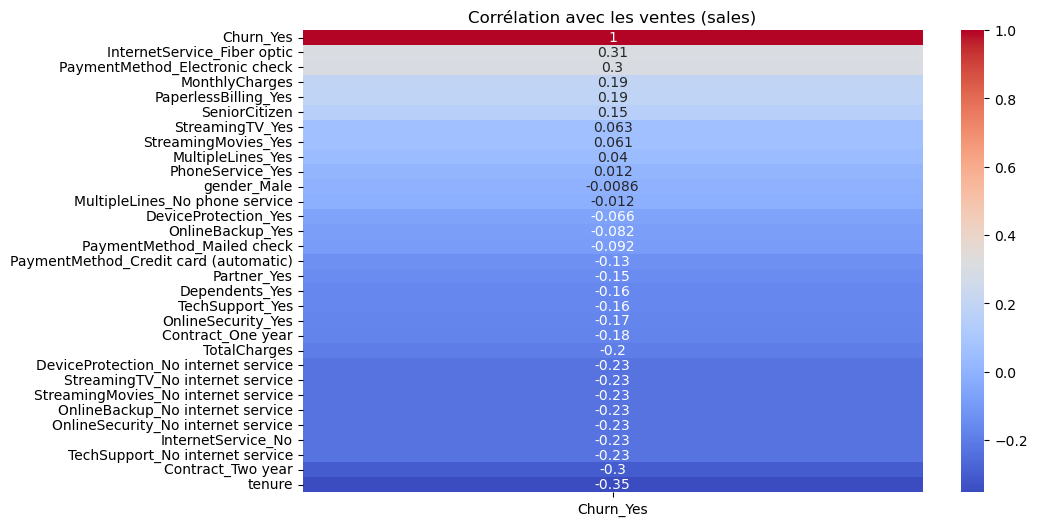

In [14]:
plt.figure(figsize=(10, 6))
corr = df_corr.corr()
sns.heatmap(corr[[target_variable]].sort_values(by=target_variable, ascending=False), annot=True, cmap='coolwarm')
plt.title("Corrélation avec les ventes (sales)")
plt.show()

## Vérification si les features sont utiles 

In [15]:
from Pipeline import pre_traitement, pipeline
from features_engineering import pipeline_features
#from Feature_engineering import pipeline_with_feature_engineering

os.getcwd()
df = pd.read_csv('customer_churn_telecom_services.csv') 

df_corr_features = df.copy()
print(df_corr_features.columns)
df_corr_features = pipeline_features(df_corr_features)

corr_features = df_corr_features.corr()
print("Corrélation entre les nouvelles features et les anciennes :")
print(corr_features.loc[['avg_monthly_charge', 'is_long_term_contract', 'num_services',
       'has_security_package', 'streaming_user', 'engagement_score',
       'is_paperless_and_monthly', 'high_monthly_charge']].head())

# Vérifier si certaines features sont presque identiques
for col in ['avg_monthly_charge', 'num_services', 'engagement_score', 'high_monthly_charge']:
    if col in df_corr_features.columns:
        print(f"\nAnalyse de {col}:")
        print(df_corr_features[col].describe())

# Vérifier la variance des nouvelles colonnes
print("\nVariance des nouvelles colonnes :")
print(df_corr_features[['avg_monthly_charge', 'num_services', 'engagement_score', 'high_monthly_charge']].var())

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'avg_monthly_charge', 'is_long_term_contract', 'num_services',
       'has_security_package', 'streaming_user', 'engagement_score',
       'is_paperless_and_monthly', 'high_monthly_charge', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Ele

## suppression : on peut supprimer 

df_corr_features = df_corr_features.drop(columns=['avg_monthly_charge', 'high_monthly_charge'], errors='ignore')


In [16]:
df_corr_features = df_corr_features.drop(columns=['avg_monthly_charge', 'high_monthly_charge'], errors='ignore')



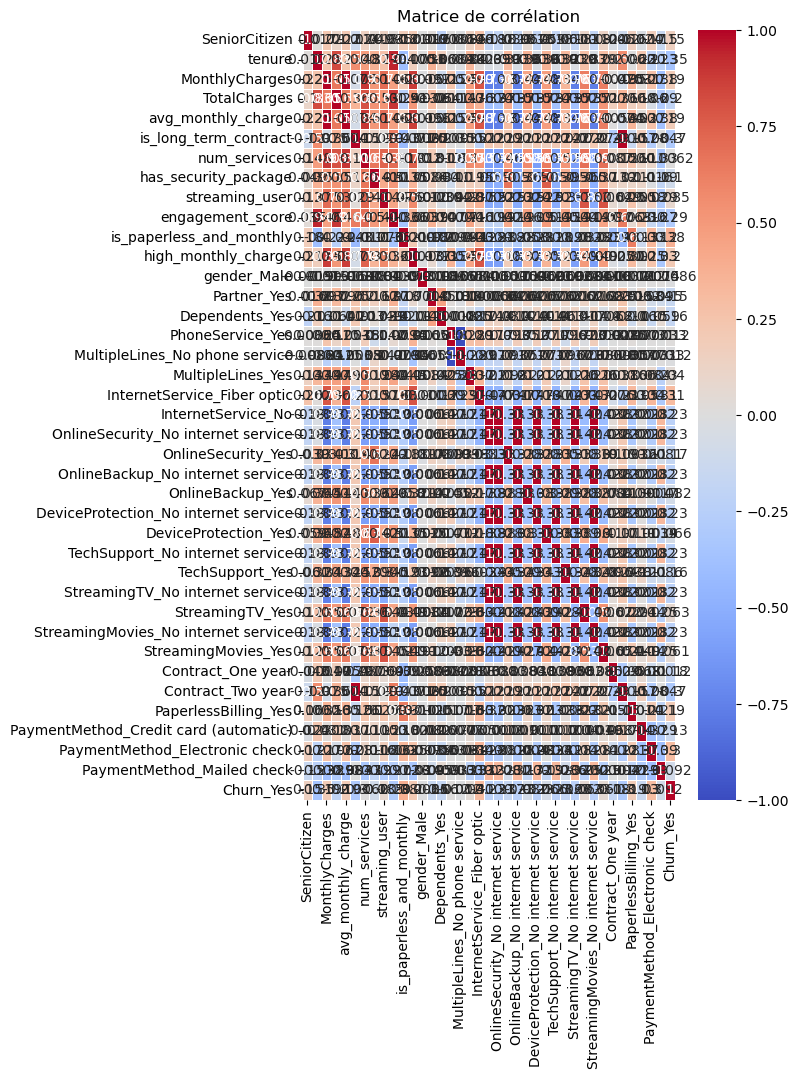

In [17]:
# Affichage avec Seaborn
plt.figure(figsize=(6, 10))
sns.heatmap(corr_features, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

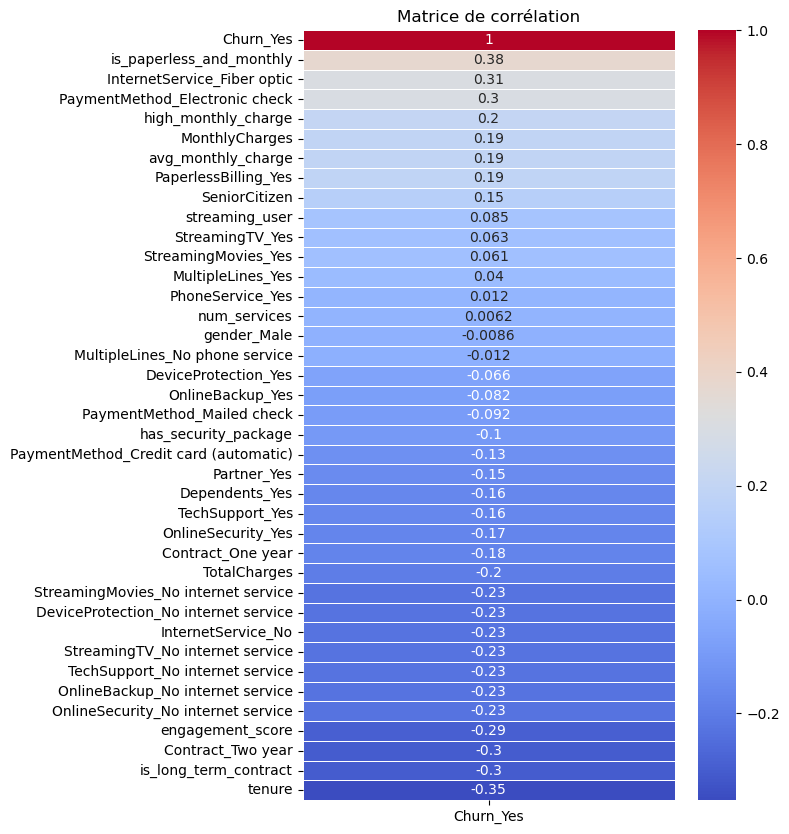

In [18]:
# Affichage avec Seaborn
plt.figure(figsize=(6, 10))
sns.heatmap(corr_features[[target_variable]].sort_values(by=target_variable, ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()